# Differential expression analysis

In [1]:
suppressMessages(library(DESeq2))

Reads aligned to each gene were counted using featureCounts, found in `data/featureCount.txt`.

In [2]:
input.filename <- "data/featureCount.txt"
samples.filename <- "data/samples.txt"

In [3]:
input <- read.delim(input.filename, header = T, sep = "\t", check.names = F, comment.char = "#")
counts.matrix <- input[,c(
    "Geneid",
    "L18_505_S1.bam", 
    "L18_506_S2.bam", 
    "L18_507_S3.bam", 
    "L18_508_S4.bam", 
    "L18_509_S5.bam", 
    "L18_510_S6.bam", 
    "L18_511_S7.bam", 
    "L18_512_S8.bam", 
    "L18_513_S9.bam", 
    "L18_514_S10.bam", 
    "L18_515_S11.bam", 
    "L18_516_S12.bam")]

# Get total counts per gene (for sorting redundant rows)
counts.sum.by.gene <- apply(counts.matrix[, 2:ncol(counts.matrix)], 1, sum)
# Order matrix by decreasing counts.sum.by.gene, adding a numeric suffix to each symbol we've already seen.
gene.symbols.original <- as.character(counts.matrix[, 1])
gene.symbols.unique <- make.unique(gene.symbols.original)
o <- order(gene.symbols.original != gene.symbols.unique, counts.sum.by.gene, decreasing = TRUE)
gene.symbols.unique[o] <- make.unique(gene.symbols.unique[o])
# Make row names from unique gene symbols.
rownames(counts.matrix) <- gene.symbols.unique
# Drop the gene symbol (first column) since we have them as row names
counts <- counts.matrix[, -1]
counts

,L18_505_S1.bam,L18_506_S2.bam,L18_507_S3.bam,L18_508_S4.bam,L18_509_S5.bam,L18_510_S6.bam,L18_511_S7.bam,L18_512_S8.bam,L18_513_S9.bam,L18_514_S10.bam,L18_515_S11.bam,L18_516_S12.bam
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000284662,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000186827,6,3,2,5,9,7,3,0,8,3,10,3
ENSG00000186891,0,0,0,0,1,0,2,0,0,0,0,0
ENSG00000160072,8340,6236,6244,10120,9500,6825,10847,8262,6988,12669,9417,8040
ENSG00000041988,1216,1559,1308,1426,1335,1369,1563,1263,1377,2144,1605,1404
ENSG00000260179,31,19,38,59,57,31,56,43,40,64,54,44
ENSG00000234396,3,0,4,0,0,5,7,7,10,0,3,6
ENSG00000225972,1166,811,1232,2148,1346,1554,1404,1750,1481,1158,1364,1206
ENSG00000224315,67,50,61,50,63,30,65,32,66,61,89,58


In [4]:
samples <- read.delim(samples.filename, row.names = 1)
samples$clone <- factor(samples$clone)
samples$day <- relevel(factor(samples$day), ref = "D0")
samples$repeats <- relevel(factor(samples$repeats), ref = "15x")
samples$clone.n <- factor(samples$clone.n)
samples

,clone,day,repeats,clone.n
,<fct>,<fct>,<fct>,<fct>
L18_505_S1.bam,c15x9,D0,15x,c1
L18_506_S2.bam,c15x10,D0,15x,c2
L18_507_S3.bam,c15x12,D0,15x,c3
L18_508_S4.bam,c15x9,D14,15x,c1
L18_509_S5.bam,c15x10,D14,15x,c2
L18_510_S6.bam,c15x12,D14,15x,c3
L18_511_S7.bam,c99x5,D0,99x,c1
L18_512_S8.bam,c99x8,D0,99x,c2
L18_513_S9.bam,c99x26,D0,99x,c3


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "Intercept"            "repeats_99x_vs_15x"   "repeats15x.clone.nc2"
[4] "repeats99x.clone.nc2" "repeats15x.clone.nc3" "repeats99x.clone.nc3"
[7] "repeats15x.dayD14"    "repeats99x.dayD14"

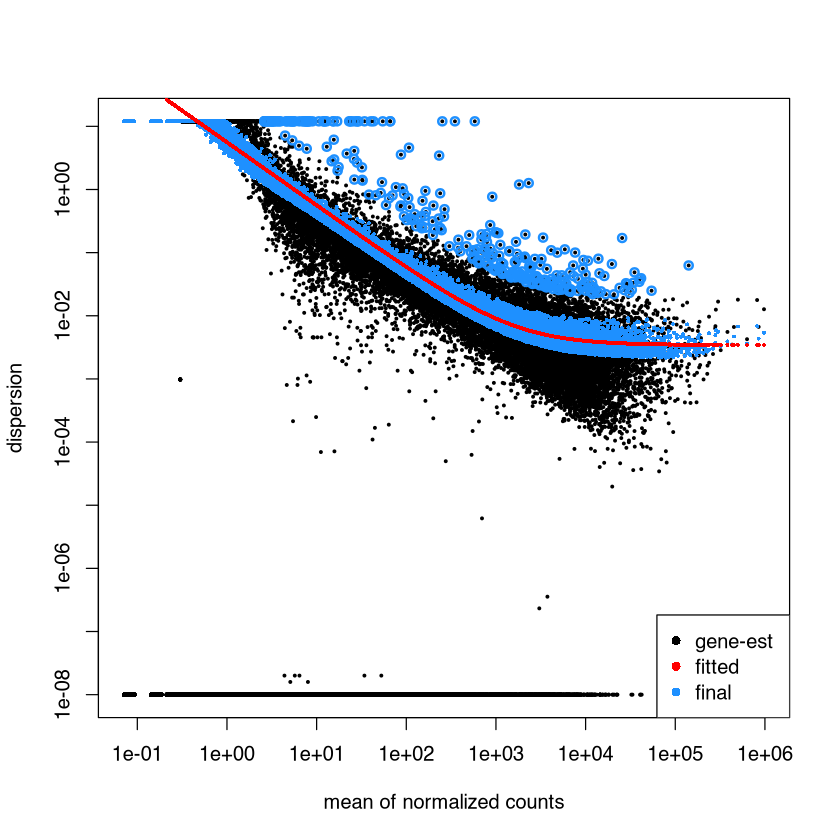

In [5]:
dds <- DESeqDataSetFromMatrix(countData = counts, colData = samples, design = ~ clone + day)
design(dds) <- ~ repeats + repeats:clone.n + repeats:day
dds <- DESeq(dds)
plotDispEsts(dds)
resultsNames(dds)

Calculate normalized counts using DESeq2 size factors (median ratio method).

In [6]:
counts.normalized <- round(t(t(counts(dds)) / sizeFactors(dds)), 2)
colnames(counts.normalized) <- paste(colnames(counts), "norm", sep = ".")

Test for differential expression and shrink LFC using apeglm.

In [7]:
coefficients <- c("repeats15x.dayD14", "repeats99x.dayD14")
for (coefficient in coefficients){
    res <- results(dds, independentFiltering = TRUE, name = coefficient)
    res.shrunk <- lfcShrink(dds, type = "apeglm", res = res, coef = coefficient)
    output.table <- cbind(rownames(dds), as.matrix(res.shrunk), counts.normalized)
    colnames(output.table)[1] <- "Feature.ID"
    write.table(output.table, file = paste("output/", coefficient, ".txt", sep = ""), 
        sep = "\t", quote = F, row.names = F)
}

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



Perform regularized logarithm transformation of counts.

In [8]:
dds.rlog <- rlog(dds, blind = FALSE)
counts.rlog <- cbind(rownames(dds), assay(dds.rlog))
colnames(counts.rlog)[1] <- "Feature.ID"
write.table(counts.rlog, file = paste("output/", "counts.rlog.txt", sep=""), sep = "\t", quote = F, row.names = F)

In [9]:
writeLines(capture.output(sessionInfo()), "R.sessionInfo.txt")
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.1 LTS

Matrix products: default
BLAS/LAPACK: /home/jason/miniconda3/envs/deseq/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] DESeq2_1.38.3               SummarizedExperiment_1.28.0
 [3] Biobase_2.58.0              MatrixGenerics_1.10.0      
 [5] matrixStats_1.0.0           GenomicRanges_1.50.2       
 [7] GenomeInfoDb_1.34.9         IRanges_2.32.0             
 [9] S4Vectors_0.36.2            BiocGenerics_0.44.0        

loaded via a namespace (and not attached):
 